In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense


In [2]:
df = pd.read_csv('ML_ALL_benchmarks.csv')
df.dropna(inplace=True)
df.head()
column = ['clock','cpuScore','gpuScore','npuScore']
classes = df['cpuName']
classes
# df[:5]

0          A15 Bionic   
1          A15 Bionic   
2          A15 Bionic   
3                 M1    
4                 M1    
             ...        
183       Exynos 8890   
184    Snapdragon 810   
185    Snapdragon 808   
186    Snapdragon 835   
187        Exynos 850   
Name: cpuName, Length: 188, dtype: object

In [3]:
df = df.drop(['company','device','cores'],axis=True)
df

,cpuName,clock,cpuScore,gpuScore,npuScore
0,A15 Bionic,3230,935,2273,2676
1,A15 Bionic,3230,931,2261,2665
2,A15 Bionic,3230,924,1852,2660
3,M1,3190,1013,2824,2657
4,M1,3190,1011,2842,2656
...,...,...,...,...,...
183,Exynos 8890,1300,133,400,71
184,Snapdragon 810,1555,85,111,71
185,Snapdragon 808,1440,78,75,68
186,Snapdragon 835,1900,146,504,66


In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
df['cpuName']= label_encoder.fit_transform(df['cpuName'])

inp = df.drop(['cpuName'],axis=1)
inp
out = df['cpuName']
out


0       8
1       8
2       8
3      33
4      33
       ..
183    18
184    51
185    50
186    52
187    17
Name: cpuName, Length: 188, dtype: int32

In [5]:
integerMapping=dict(zip(out,classes))
len(integerMapping)

63

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(inp,out,random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
len(X_train)

141

In [8]:
# Initializing the ANN
ann1 = tf.keras.models.Sequential()
# Add the input layer and first hidden layer
ann1.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=X_train[0].shape))

ann1.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann1.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann1.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Add the output layer

ann1.add(tf.keras.layers.Dense(units=63, activation='sigmoid'))

In [9]:
ann1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
ann1.fit(X_train, Y_train, batch_size = 32, epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 4.1300 - accuracy: 0.0142
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 4.0840 - accuracy: 0.0993
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 4.0393 - accuracy: 0.1631
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 3.9821 - accuracy: 0.1986
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 3.9084 - accuracy: 0.2270
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 3.8114 - accuracy: 0.2270
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 3.6885 - accuracy: 0.2411
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 3.5618 - accuracy: 0.2624
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 3.4296 - accuracy: 0.2624
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 3.3043 - accuracy: 0.2128
Epoch 11/100
5/5 [===========

In [10]:
ann1.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 3ms/step - loss: 10.6005 - accuracy: 0.5745


[10.60053825378418, 0.5744680762290955]

In [11]:
# Initializing the ANN
ann2 = tf.keras.models.Sequential()
# Add the input layer and first hidden layer

ann2.add(tf.keras.layers.Dense(units=4, activation='relu', input_shape=X_train[0].shape))
# Add the second hidden layer
ann2.add(tf.keras.layers.Dense(units=128, activation='relu'))
# Add the output layer
ann2.add(tf.keras.layers.Dense(units=63, activation='sigmoid'))

In [12]:
ann2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
ann2.fit(X_train, Y_train, batch_size = 32, epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 4.1676 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 4.1230 - accuracy: 0.0071
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 4.0852 - accuracy: 0.0355
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 4.0444 - accuracy: 0.0638
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 4.0072 - accuracy: 0.0709
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 3.9662 - accuracy: 0.0709
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 3.9224 - accuracy: 0.0709
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 3.8757 - accuracy: 0.0922
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 3.8252 - accuracy: 0.1348
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 3.7711 - accuracy: 0.1348
Epoch 11/100
5/5 [=======

In [13]:
ann2.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 3ms/step - loss: 4.4405 - accuracy: 0.3617


[4.440503120422363, 0.3617021143436432]

In [14]:

# Initializing the ANN
ann3 = tf.keras.models.Sequential()
# Add the input layer and first hidden layer
ann3.add(tf.keras.layers.Dense(units=16, activation='relu', input_shape=X_train[0].shape))

ann3.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann3.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Add the output layer
ann3.add(tf.keras.layers.Dense(units=63, activation='sigmoid'))

In [15]:
ann3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
ann3.fit(X_train, Y_train, batch_size = 32, epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 4.1322 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 4.0669 - accuracy: 0.0780
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 4.0037 - accuracy: 0.1348
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 3.9379 - accuracy: 0.1915
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 3.8616 - accuracy: 0.2411
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 3.7754 - accuracy: 0.2411
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 3.6744 - accuracy: 0.2411
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 3.5618 - accuracy: 0.2411
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 3.4527 - accuracy: 0.2340
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 3.3376 - accuracy: 0.2270
Epoch 11/100
5/5 [=======

In [16]:
ann3.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 4ms/step - loss: 7.1223 - accuracy: 0.5957


[7.122270107269287, 0.5957446694374084]

In [17]:
models  =[ann1,ann2,ann3]
preds = [model.predict(X_test) for model in models]
preds = np.array(preds)
weights = [0.5,0.3,0.3]
weights_pred  =np.tensordot(preds,weights,axes = ((0),(0)))

2/2 [==============================] - 0s 3ms/step


In [18]:
weight_ensemble_prediction = np.argmax(weights_pred,axis=1)


In [19]:
predictions1  = ann1.predict(X_test)
predictions1 = [np.argmax(element) for element in predictions1]
predictions2  = ann2.predict(X_test)
predictions2 = [np.argmax(element) for element in predictions2]
predictions3  = ann2.predict(X_test)
predictions3 = [np.argmax(element) for element in predictions3]


2/2 [==============================] - 0s 3ms/step


In [20]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(Y_test,predictions1)
accuracy2 = accuracy_score(Y_test,predictions2)
accuracy3 = accuracy_score(Y_test,predictions3)
weight_accuracy = accuracy_score(Y_test,weight_ensemble_prediction)

In [21]:
print("accuracy1 = ",accuracy1)
print("accuracy2 = ",accuracy2)
print("accuracy3 = ",accuracy3)
print("accuracy of average = ",weight_accuracy)

accuracy1 =  0.5106382978723404
accuracy2 =  0.3617021276595745
accuracy3 =  0.3617021276595745
accuracy of average =  0.5531914893617021


Text(70.72222222222221, 0.5, 'truths')

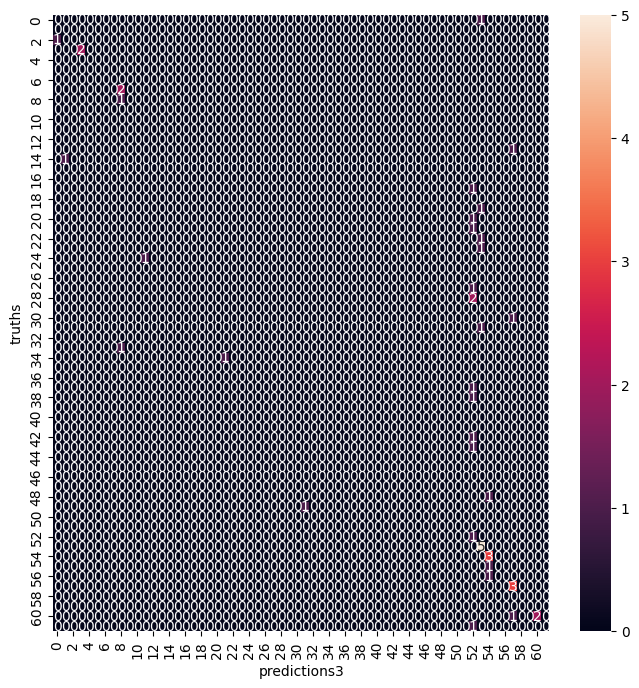

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = tf.math.confusion_matrix(labels = Y_test,predictions = predictions3)
plt.figure(figsize=(8,8))
sn.heatmap(cm,annot=True,fmt = 'd')
plt.xlabel('predictions3')
plt.ylabel('truths')